In [1]:
!makeblastdb -in ../data/Bpl.maker_FilteredModels_proteins_v1.0.fasta \
             -dbtype prot \
             -out data/Bpl_proteome_db




Building a new DB, current time: 12/12/2025 17:03:05
New DB name:   /Users/oakley/Documents/GitHub/scripts/notebooks/data/Bpl_proteome_db
New DB title:  ../data/Bpl.maker_FilteredModels_proteins_v1.0.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /Users/oakley/Documents/GitHub/scripts/notebooks/data/Bpl_proteome_db
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 33584 sequences in 0.356655 seconds.


Adding sequences from FASTA; added 33584 sequences in 0.356655 seconds.




In [2]:
!makeblastdb -in ../data/Mph.maker_FilteredModels_proteins_v1.0.fasta \
             -dbtype prot \
             -out data/Mph_proteome_db



Building a new DB, current time: 12/12/2025 17:03:09
New DB name:   /Users/oakley/Documents/GitHub/scripts/notebooks/data/Mph_proteome_db
New DB title:  ../data/Mph.maker_FilteredModels_proteins_v1.0.fasta
Sequence type: Protein
Keep MBits: T
Maximum file size: 3000000000B
Adding sequences from FASTA; added 36549 sequences in 0.381092 seconds.


Adding sequences from FASTA; added 36549 sequences in 0.381092 seconds.




In [3]:
query = """>XP_052069431.1 rhodopsin, GQ-coupled-like [Mytilus californianus]
MSGTSASPDNATSIPFNGTTSVYDTYGYFIHPHWKQFPVVPDEYHYMVGIYITFVGITGIIGNSIVIWIF
STTKNLKTPSNMLIMNLALSDLVFSAVNGFPLLTISAFNRKWMWGDAACQLYGFIGGLFGLMSIITLAAI
SIDRYYNIAEPLKAAQFMTRRKAFMMIVLVWIWSLVWAVPPIFGWGAYVPEGFQTSCTFDYISTEPHMRA
YMIGMYIGGFVLPLVMIIVSYVLIWKAIRKHENEMLSMAKKMKIEDIRNNQEKANAEVRIAKIAMIIVLL
YLLSWSPYATVALIAQFGPAEWVTPYVSELPVMLAKAAAMHNPIVYAFSHPRFRQALHKRVPWLLCCCDV
TPARSASTSHSKVTTKRQVSRQVSNDSYYDGRADSDVSSCISQIDDYGQSIEMKKTVSDTSFTRRSNKKA
VKGSPMGSPDSEDIVRELIQALVSVSHRPPAVQPQYTPNIPPQNNLQNPDNAQKGVYVIDNGKQIDMATY
LSHLVATGRNSDTVTKNPTPNLPIVKQNIDNTDESVKANEKKAHQDKQIDVQKGHGKDKDTGNQQTRDSS
SDEGNSSKVCYSNQAYDKGADDNDKSTIIDDGHV
"""

with open("opsin_query.fa", "w") as f:
    f.write(query)

print("Query FASTA written to opsin_query.fa")


Query FASTA written to opsin_query.fa


In [4]:
!blastp \
  -query opsin_query.fa \
  -db data/Bpl_proteome_db \
  -evalue 1e-5 \
  -max_target_seqs 20 \
  -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore" \
  -out opsin_vs_Bpl.tsv

print("BLAST search finished. Results saved to opsin_vs_Bpl.tsv")


BLAST search finished. Results saved to opsin_vs_Bpl.tsv


In [5]:
!blastp \
  -query opsin_query.fa \
  -db data/Mph_proteome_db \
  -evalue 1e-5 \
  -max_target_seqs 20 \
  -outfmt "6 qseqid sseqid pident length mismatch gapopen qstart qend sstart send evalue bitscore" \
  -out opsin_vs_Mph.tsv

print("BLAST search finished. Results saved to opsin_vs_Mph.tsv")

BLAST search finished. Results saved to opsin_vs_Mph.tsv


In [6]:
!head opsin_vs_Bpl.tsv


XP_052069431.1	Bpl_scaf_38266-2.5	67.009	585	178	8	4	587	1	571	0.0	790
XP_052069431.1	Bpl_scaf_38266-1.1	56.522	391	133	7	118	501	11	371	3.57e-136	416
XP_052069431.1	Bpl_scaf_38266-1.1	53.247	385	146	7	119	501	443	795	4.80e-121	376
XP_052069431.1	Bpl_scaf_38266-1.1	57.895	38	14	1	16	51	416	453	1.95e-07	53.9
XP_052069431.1	Bpl_scaf_19671-4.8	34.432	273	162	4	117	385	2	261	5.04e-47	166
XP_052069431.1	Bpl_scaf_64903-1.9	26.912	353	225	7	41	390	24	346	4.21e-35	135
XP_052069431.1	Bpl_scaf_10550-3.6	25.610	328	207	5	47	338	35	361	2.98e-31	126
XP_052069431.1	Bpl_scaf_57877-0.0	25.574	305	197	9	46	339	38	323	5.98e-27	113
XP_052069431.1	Bpl_scaf_64903-1.7	31.658	199	133	3	41	238	24	220	7.90e-27	109
XP_052069431.1	Bpl_scaf_39839-0.1	25.000	304	200	8	46	339	66	351	1.13e-26	112


In [7]:
!head opsin_vs_Mph.tsv

XP_052069431.1	Mph_scaf_44449-0.0	63.265	490	162	5	119	594	1	486	0.0	632
XP_052069431.1	Mph_scaf_62139-0.4	62.288	472	153	5	17	484	17	467	0.0	586
XP_052069431.1	Mph_scaf_22824-0.28	53.557	506	170	8	10	509	14	460	1.00e-166	483
XP_052069431.1	Mph_scaf_10402-0.0	33.579	271	172	2	74	337	6	275	4.31e-57	194
XP_052069431.1	Mph_scaf_49026-0.0	33.224	304	188	6	48	350	20	309	9.10e-51	179
XP_052069431.1	Mph_scaf_53665-0.10	27.066	351	218	9	41	380	21	344	2.44e-34	133
XP_052069431.1	Mph_scaf_4486-0.8	25.797	345	236	6	41	383	21	347	3.31e-34	133
XP_052069431.1	Mph_scaf_71213-1.7	25.234	321	193	6	59	338	47	361	6.52e-29	119
XP_052069431.1	Mph_scaf_17083-1.2	25.419	358	207	12	1	339	1	317	3.62e-28	117
XP_052069431.1	Mph_scaf_26020-0.3	27.393	303	186	9	57	348	52	331	2.77e-26	110


In [8]:
import pandas as pd

# Read BLAST hits for Bpl
cols = ["qseqid","sseqid","pident","length","mismatch","gapopen","qstart","qend","sstart","send","evalue","bitscore"]
df_bpl = pd.read_csv("opsin_vs_Bpl.tsv", sep="\t", names=cols)

# Identify strong candidates (>=45% identity and length >200 aa)
candidates_bpl = df_bpl[(df_bpl["pident"] >= 45) & (df_bpl["length"] > 200)]["sseqid"].unique().tolist()

print("Strong opsin-like candidates (Bpl):", candidates_bpl)

# Extract sequences with Bpl_ prefix
from Bio import SeqIO

proteome_bpl = "../data/Bpl.maker_FilteredModels_proteins_v1.0.fasta"
records_bpl = SeqIO.to_dict(SeqIO.parse(proteome_bpl, "fasta"))

with open("Bpl_opsins.fa", "w") as out:
    for cid in candidates_bpl:
        if cid in records_bpl:
            rec = records_bpl[cid]
            rec.id = f"Bpl_{rec.id}"
            rec.description = ""
            SeqIO.write(rec, out, "fasta")
        else:
            print("WARNING: ID not found in proteome:", cid)

print("Extracted Bpl sequences written to Bpl_opsins.fa")

Strong opsin-like candidates (Bpl): ['Bpl_scaf_38266-2.5', 'Bpl_scaf_38266-1.1']
Extracted Bpl sequences written to Bpl_opsins.fa
Extracted Bpl sequences written to Bpl_opsins.fa


In [9]:
import pandas as pd

# Read BLAST hits for Mph
cols = ["qseqid","sseqid","pident","length","mismatch","gapopen","qstart","qend","sstart","send","evalue","bitscore"]
df_mph = pd.read_csv("opsin_vs_Mph.tsv", sep="\t", names=cols)

# Identify strong candidates (>=45% identity and length >200 aa)
candidates_mph = df_mph[(df_mph["pident"] >= 45) & (df_mph["length"] > 200)]["sseqid"].unique().tolist()

print("Strong opsin-like candidates (Mph):", candidates_mph)

# Extract sequences with Mph_ prefix
from Bio import SeqIO

proteome_mph = "../data/Mph.maker_FilteredModels_proteins_v1.0.fasta"
records_mph = SeqIO.to_dict(SeqIO.parse(proteome_mph, "fasta"))

with open("Mph_opsins.fa", "w") as out:
    for cid in candidates_mph:
        if cid in records_mph:
            rec = records_mph[cid]
            rec.id = f"Mph_{rec.id}"
            rec.description = ""
            SeqIO.write(rec, out, "fasta")
        else:
            print("WARNING: ID not found in proteome:", cid)

print("Extracted Mph sequences written to Mph_opsins.fa")

Strong opsin-like candidates (Mph): ['Mph_scaf_44449-0.0', 'Mph_scaf_62139-0.4', 'Mph_scaf_22824-0.28']
Extracted Mph sequences written to Mph_opsins.fa


In [10]:
from Bio import SeqIO

print("Bpl opsins:")
for rec in SeqIO.parse("Bpl_opsins.fa", "fasta"):
    print(rec.id, "length:", len(rec.seq))

print("\nMph opsins:")
for rec in SeqIO.parse("Mph_opsins.fa", "fasta"):
    print(rec.id, "length:", len(rec.seq))

Bpl opsins:
Bpl_Bpl_scaf_38266-2.5 length: 571
Bpl_Bpl_scaf_38266-1.1 length: 806

Mph opsins:
Mph_Mph_scaf_44449-0.0 length: 486
Mph_Mph_scaf_62139-0.4 length: 494
Mph_Mph_scaf_22824-0.28 length: 488


In [11]:
from Bio import Entrez, SeqIO

# Always set your email for NCBI
Entrez.email = "your_email@ucsb.edu"  # <-- change this

# 1. Search for bivalve opsin proteins
search_term = "opsin[Title] AND Bivalvia[Organism] AND srcdb_refseq[PROP]"
handle = Entrez.esearch(db="protein", term=search_term, retmax=30)
record = Entrez.read(handle)
handle.close()

ids = record["IdList"]
print(f"Found {len(ids)} protein IDs")

# 2. Fetch the corresponding protein sequences
if ids:
    handle = Entrez.efetch(db="protein", id=",".join(ids), rettype="fasta", retmode="text")
    seqs = list(SeqIO.parse(handle, "fasta"))
    handle.close()

    print(f"Fetched {len(seqs)} sequences")

    # 3. Write to a FASTA file
    with open("bivalve_opsins.fa", "w") as out:
        for rec in seqs:
            SeqIO.write(rec, out, "fasta")

    print("Wrote bivalve_opsins.fa")
else:
    print("No IDs found for this query.")


Found 9 protein IDs
Fetched 9 sequences
Wrote bivalve_opsins.fa
Fetched 9 sequences
Wrote bivalve_opsins.fa


In [12]:
from Bio import SeqIO

final_list = []

# Load Bpl opsins (already renamed with Bpl_ prefix)
final_list.extend(list(SeqIO.parse("Bpl_opsins.fa", "fasta")))

# Load Mph opsins (already renamed with Mph_ prefix)
final_list.extend(list(SeqIO.parse("Mph_opsins.fa", "fasta")))

# Load the bivalve opsins we fetched from NCBI
final_list.extend(list(SeqIO.parse("bivalve_opsins.fa", "fasta")))

print(f"Total sequences in combined dataset: {len(final_list)}")
print(f"  - Bpl opsins: {len(list(SeqIO.parse('Bpl_opsins.fa', 'fasta')))}")
print(f"  - Mph opsins: {len(list(SeqIO.parse('Mph_opsins.fa', 'fasta')))}")
print(f"  - NCBI bivalve opsins: {len(list(SeqIO.parse('bivalve_opsins.fa', 'fasta')))}")

# Write unified FASTA
with open("all_bivalve_opsins.fa", "w") as out:
    SeqIO.write(final_list, out, "fasta")

print("Wrote all_bivalve_opsins.fa")
!mafft --auto all_bivalve_opsins.fa > all_bivalve_opsins_aligned.fa

Total sequences in combined dataset: 14
  - Bpl opsins: 2
  - Mph opsins: 3
  - NCBI bivalve opsins: 9
Wrote all_bivalve_opsins.fa
outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   10 / 14
done.

Progressive alignment ... 
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   10 / 14
done.

Progressive alignment ... 

In [20]:
from Bio import SeqIO
import re

def clean_header(rec):
    desc = rec.description

    # Check if already has Bpl_ or Mph_ prefix
    if rec.id.startswith("Bpl_") or rec.id.startswith("Mph_"):
        # Already properly named, just sanitize
        new_id = rec.id.replace(":", "_").replace(".", "_")
        return new_id

    # extract species name from NCBI description if present
    m = re.search(r"\[(.*?)\]", desc)
    if m:
        species = m.group(1).replace(" ", "_")
    else:
        species = "Unknown_sp"

    # Build ID: SpeciesName_Accession
    new_id = f"{species}_{rec.id}"
    # sanitize
    new_id = new_id.replace(":", "_").replace(".", "_")
    return new_id

renamed = []
for rec in SeqIO.parse("all_bivalve_opsins.fa", "fasta"):
    new_id = clean_header(rec)
    rec.id = new_id
    rec.description = ""
    renamed.append(rec)

with open("all_bivalve_opsins_renamed.fa", "w") as out:
    SeqIO.write(renamed, out, "fasta")

print("Wrote all_bivalve_opsins_renamed.fa with cleaned headers.")

Wrote all_bivalve_opsins_renamed.fa with cleaned headers.


In [21]:
!mafft --auto all_bivalve_opsins_renamed.fa > all_bivalve_opsins_renamed_aligned.fa



outputhat23=16
treein = 0
compacttree = 0
stacksize: 8176 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
tbfast-pair (aa) Version 7.526
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   10 / 14
done.

Progressive alignment ... 
STEP    13 /13 Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   10 / 14
done.

Progressive alignment ... 
STEP    13 /13 
done.
tbfast (aa) Version 7.526
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 6

In [26]:
!iqtree2 \
  -s all_bivalve_opsins_renamed_aligned.fa \
  -st AA \
  -m LG+G4 \
  -nt AUTO \
  -pre bivalve_opsins_cleaned \
  -redo


IQ-TREE multicore version 2.3.6 for MacOS ARM 64-bit built Jul 30 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    gamera.eemb.ucsb.edu (SSE4.2, 32 GB RAM)
Command: iqtree2 -s all_bivalve_opsins_renamed_aligned.fa -st AA -m LG+G4 -nt AUTO -pre bivalve_opsins_cleaned -redo
Seed:    945309 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Fri Dec 12 17:12:33 2025
Kernel:  SSE2 - auto-detect threads (10 CPU cores detected)

Reading alignment file all_bivalve_opsins_renamed_aligned.fa ... Fasta format detected
Reading fasta file: done in 0.000234127 secs using 75.17% CPU
Alignment most likely contains protein sequences
Alignment has 14 sequences with 1137 columns, 807 distinct patterns
436 parsimony-informative, 267 singleton sites, 434 constant sites
                                        Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 5.29289e-05 se

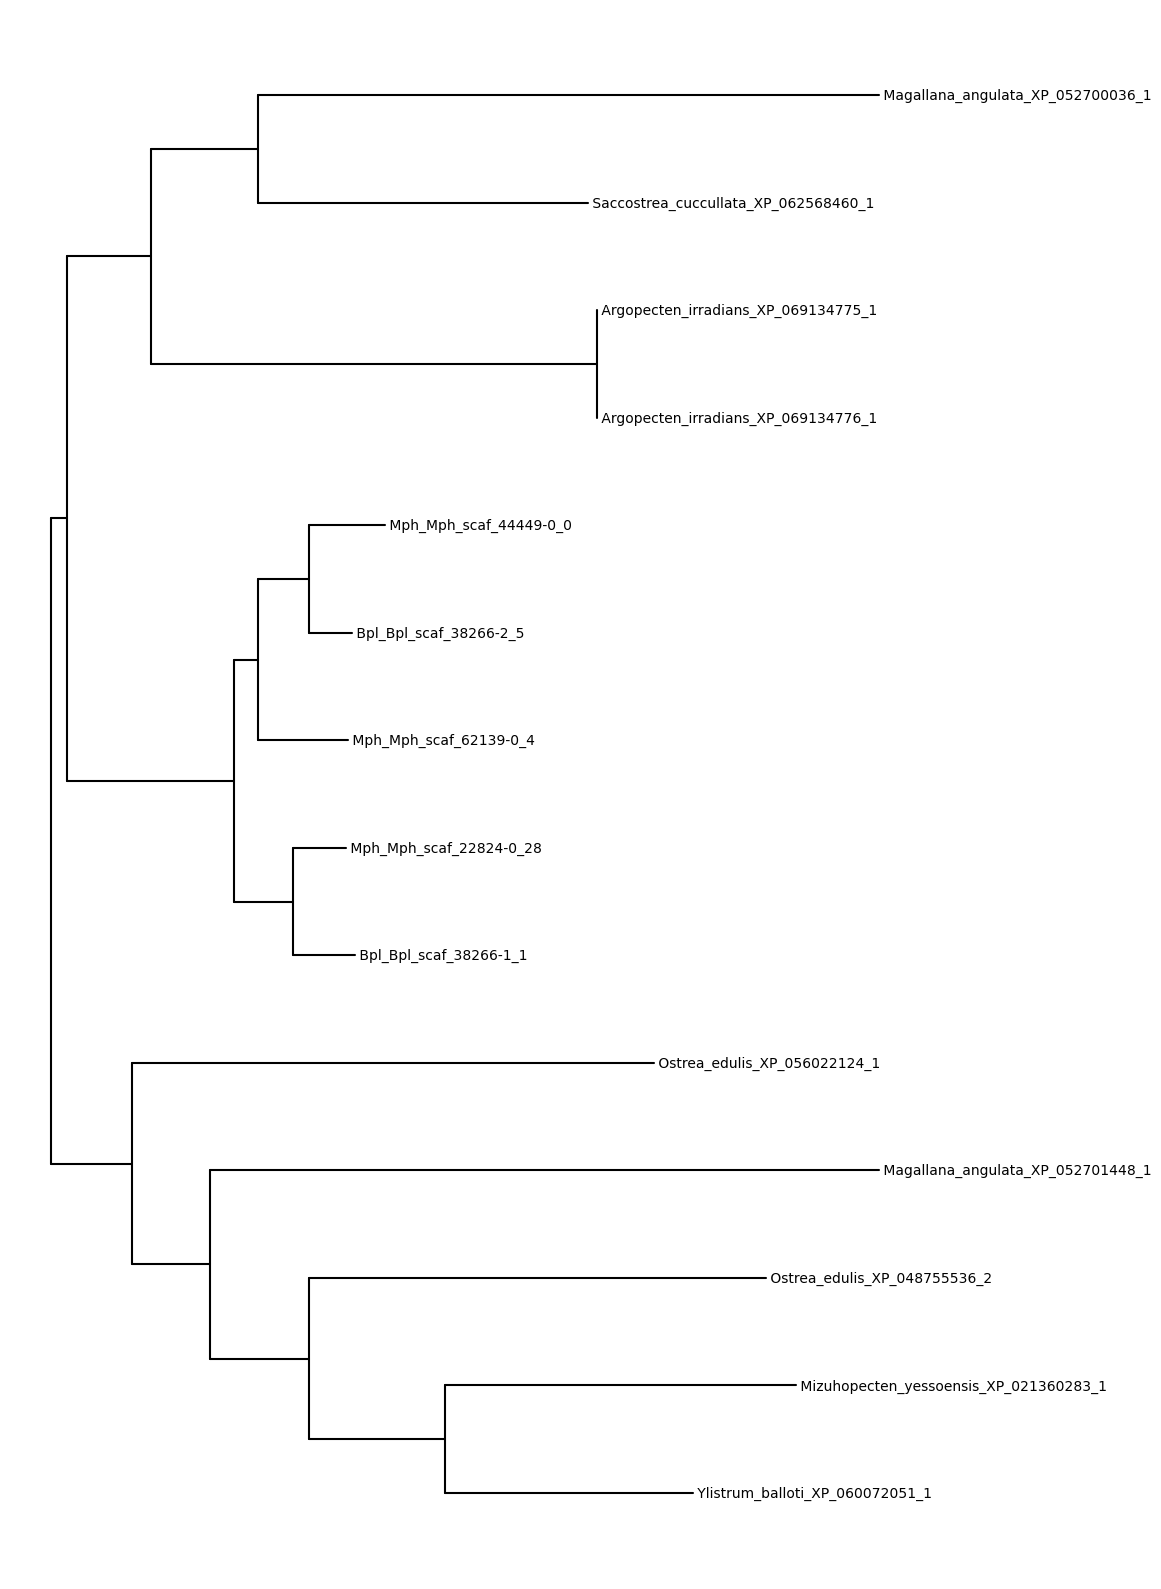

In [28]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Read the unrooted tree from IQ-TREE (built from combined Bpl, Mph, and NCBI sequences)
tree = Phylo.read("bivalve_opsins_cleaned.treefile", "newick")

# Midpoint root the tree
tree.root_at_midpoint()

# Save the rooted tree
Phylo.write(tree, "bivalve_opsins_cleaned_midpoint_rooted.treefile", "newick")

# Plot the midpoint-rooted tree without the axis box
fig = plt.figure(figsize=(12, 16))
ax = fig.add_subplot(1, 1, 1)

# Draw the tree
Phylo.draw(tree, axes=ax, do_show=False)

# Remove the box around the plot
ax.axis('off')

plt.tight_layout()
plt.show()

In [33]:
# Pairwise alignment between Mytilus bait and Mph_Mph_scaf_22824-0.28
from Bio import SeqIO, pairwise2
from Bio.pairwise2 import format_alignment

# Load Mytilus bait sequence from the query string
bait_record = SeqIO.read("opsin_query.fa", "fasta")

# Try to find the Mph sequence by matching the original or renamed id
mph_record = None
for rec in SeqIO.parse("Mph_opsins.fa", "fasta"):
    if "22824" in rec.id:
        mph_record = rec
        break
if mph_record is None:
    raise ValueError("Could not find sequence containing '22824' in Mph_opsins.fa")

# Perform global alignment (Needleman-Wunsch)
alignments = pairwise2.align.globalxx(bait_record.seq, mph_record.seq)

# Show the best alignment clearly
print(f"Alignment between {bait_record.id} (bait) and {mph_record.id} (Mph):\n")
print(format_alignment(*alignments[0]))

Alignment between XP_052069431.1 (bait) and Mph_Mph_scaf_22824-0.28 (Mph):

MSGTS----ASP--DN----AT-SIPFNG---TTSV---YDTYGYFIHP-HWKQFPVV---PDEYH--YM-VGIYITF-VGITGIIGNSIV-IWIFSTTKNLKTPSNMLIMNLALSDL-VFSAVNG-FP--L---LTISAFNRKWMWGDAACQL----YGFIGGLFGL-MSII-TLA-AISIDRYY-NIAE-PLKAAQ----FMTRRKA---FMMIVL-VWIWSLVWAVPPIFGWGAYV-PEGFQTSCTFDYI-ST-EPHMRA-YMIGM---YIG-GFV-LPLVM-IIVS--YVLIWK--AIRKHEN---EMLS--MAKKM-KI-EDIRN-NQEKAN--AEVRIAKIAM-IIVLLYL--LSWS-PYATVALIA-QFGPA-EWV-TPY-VSELPVMLAKAA-AMH-NPIVYAFSHPR-FRQ-ALH-KRVPWLLC---CCDV-TPARSAST-----SH---SKVT----T-KRQ-VSRQVSND-SYYDGRAD------S--DV-SSCISQ-IDDYGQSIEMKKTVSDTSFTR-------RSNKK-AVKGS---PM-GSPDSE--DIVR-ELIQ--ALVS-V-SHRPPAVQPQYT---P----NIP---PQ--NNLQNPDNAQKGVYVI--D-NGKQIDMAT--YLSH-LVATGRNSDTVTKNP-----TP--NLPIVKQNIDNTDESVK-ANEKKAHQDKQIDVQKGHGKDKD-TGNQQTRDSSS-DEGNSSKVCYS-NQAYD--KGADDNDKS-TIIDDGH-V-----
|        |    ||    || |    |   ||||   || | | ||  |||||      ||  |  |  ||||||  |||||||||| | |||||      |               ||      |   |   || |              |  